<a href="https://colab.research.google.com/github/LuisaUpegui/sales_predictions-/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales prediction 


# Exploración de datos.

Conocer el set de datos, ver que tipo de variables se tienen, si hay o no valores nulos, si los hay que hacer con ellos. Limpiar nuestro set y mirar que podria contestarse con este.

In [365]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [265]:
import pandas as pd 
filename="/content/drive/MyDrive/Colab Notebooks/Coding dojo/sales-predictions/sales_predictions.csv"

In [266]:
df=pd.read_csv(filename)

In [267]:
 #¿Cuántas filas y columnas?  Hay 8523 filas y 12 columnas 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [268]:
#¿Cuáles son los tipos de datos en cada variable?
# Hay 4 columnas de tipo flotante, 1 columna con tipo de variable entero, y  7 columnas con tipo de variable categorica (object)

In [269]:
#3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados. No hay valores duplicados 
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool>

In [270]:
#4) Identifiquen los valores faltantes. Hay dos columnas con valores faltantes, la columna item_weight 
# y la columna outlet_size 
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [271]:
#5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios,así que expliquen su elección).

In [272]:
df[df["Item_Identifier"]== "FDP10"]



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [273]:
#La columna "Item_Weighth" esta asociado con la columna "Item_Identifier", despues de hacer una busqueda se pudo encontrar
# que el item con  identificador FDP10 era el que presentaba valores faltantes pero algunas de sus filas estaban
#completamente llenas es por eso que para rellenar "Item_Weighth" se va a usar el valor puesto en el resto de filas el cual es 
# 19.0

df['Item_Weight'].fillna(19.0, inplace=True)



In [274]:
#Para la columna "Outlet_Size" pasa algo similar al punto anterior pero esta vez hay una asociación entre la columna
# "Outlet_Size" y "Outlet_Type"== grosery store-->  según los datos puede inferirse que los datos faltantes 
# tienen valor a  'Small' ya que en esta solo hay estos dos valores (nan, 'Small')

In [275]:
grosery = df["Outlet_Type"]=='Grocery Store'
df1 = df.loc[grosery, :]

In [276]:
#Valores que toma 'Outlet_Size' filtrada por 'Grocery Store
df1['Outlet_Size'].unique()

array([nan, 'Small'], dtype=object)

In [277]:
#Reemplazar los NA por "Small"
df['Outlet_Size'].fillna('Small', inplace=True)


In [278]:
#6. Confirmar que no hay valores faltantes después de abordarlos
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [279]:
#7. Encuentren y arreglen alguna categoría inconsistente de datos 
#La columna llamada Item_Fat_Content tiene LF, Low Fat y low fat (estandarizar por Low Fat) y 
#lo mismo para el valor Regular y reg
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [280]:
change={'low fat': 'Low Fat','Low Fat':'Low Fat', 'LF':'Low Fat',"reg":'Regular','Regular':'Regular' }

In [281]:
df['Item_Fat_Content']= df['Item_Fat_Content'].map(change)

In [282]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [283]:
 #8. Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [285]:
df['Item_Weight'].describe()


count    8523.000000
mean       13.912000
std         4.819264
min         4.555000
25%         9.310000
50%        14.500000
75%        19.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [286]:
df['Item_Visibility'].describe()


count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [287]:
df['Item_MRP'].describe()


count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [288]:
df['Item_Outlet_Sales'].describe()


count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

# Análisis exploratorio de los datos 

Hacer un analisis de nuestro set de datos mediante visualizaciones. 

In [289]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [296]:
import plotly.express as px



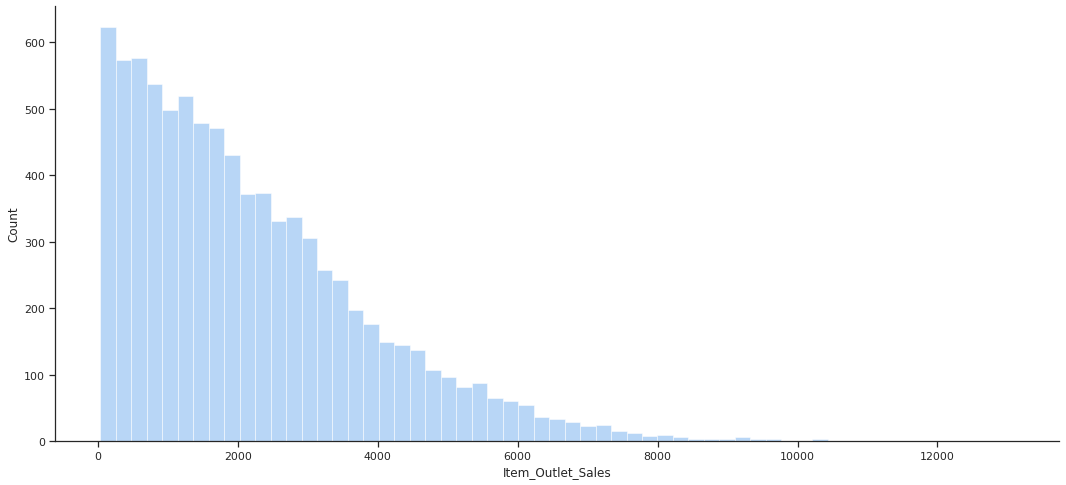

In [400]:
#Vamos a evaluar la variable que queremos predecir, en este caso Item_Outlet_Sales

sns.set_theme(style="ticks", palette="pastel")

f, ax = plt.subplots(figsize=(18, 8))
sns.despine(f)

sns.histplot(
    df,
    x="Item_Outlet_Sales", 
    linewidth=.5,
)


In [298]:
# Vamos a evaluar oblicuidad y kurtosis
# Oblicuidad/Skewness >0 nos indica que esta esta sesgada a la izquierda, como lo podemos ver en la gráfica 
# Kurtosis: tiene un valor de 1.6 nos indica que es una grafica platicurtica (achatada)
print('Skewness: %f'% df.Item_Outlet_Sales.skew())
print('Kurtosis: %f'% df.Item_Outlet_Sales.kurt())

Skewness: 1.177531
Kurtosis: 1.615877


In [336]:
fil = df.reset_index().groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].mean()


In [340]:
fil = fil.reset_index()

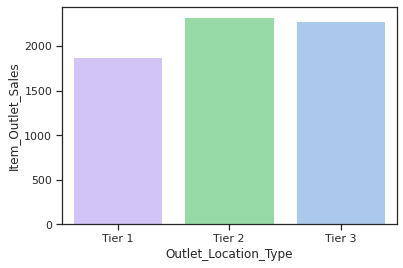

In [382]:
# Promedio de ventas dado el tipo de locación 
# Este gráfico muestra como el tipo de locacion Tier dos vende en promedio más 
# que los otros dos, siendo Tier 1 el que vende menos.
sns.set_theme(style="ticks", palette="pastel")

sns.barplot(data=fil, x='Outlet_Location_Type', y="Item_Outlet_Sales", palette=["m", "g",'b'])


In [350]:
fil2 = df.reset_index().groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean()


In [353]:
fil2 = fil2.reset_index()

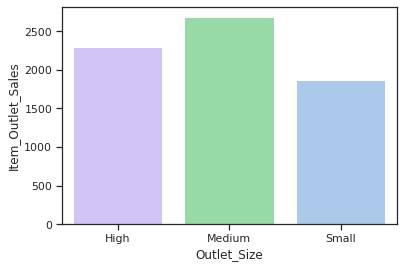

In [381]:
# Promedio de ventas dado el tamaño de la tienda 
# En este podemos ver que el número de ventas promedio en la tienda de tamaño medio
# es mayor con respecto a los otros dos siendo Small el tamaño de tienda 
# el cual tiene el promedio de ventas más bajo
sns.set_theme(style="ticks", palette="pastel")

sns.barplot(data=fil2, x='Outlet_Size', y="Item_Outlet_Sales",palette=["m", "g",'b'])


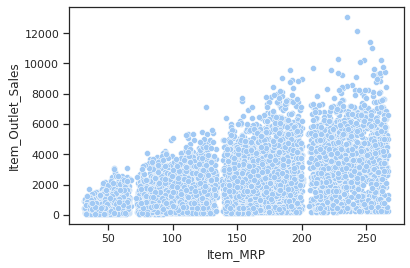

In [384]:
## La variable Item_MRP parece tener relacion con la variable a predecir, lo que sugiere que puede ser de gran importancia 
# en la clasificación. Sin embargo la relacion no es del todo lineal y esto se debe a que hay presencia de outliers  
sns.set_theme(style="ticks", palette="pastel")

sns.scatterplot(data=df, x="Item_MRP", y="Item_Outlet_Sales")

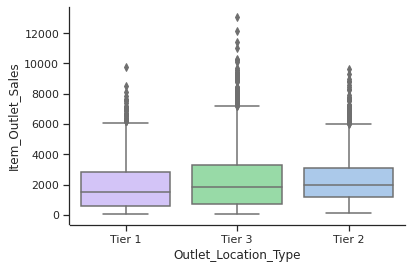

In [395]:
## Este gráfico de box plot nos permite observar el a mayor tipo de area  las ventas de los productos
# toman valores mayores, ademas la distribucion de los valores en el tier 3 es mayor que en los otros tier 
# otra de las cosas que se puede observar es que para las tres categorias de tier hay outliers.

sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="Outlet_Location_Type", y="Item_Outlet_Sales",
           palette=["m", "g",'b'],
            data=df)
sns.despine(offset=1, trim= False)


In [291]:
temp = df.reset_index().groupby(['Item_Type', 'Outlet_Size'])['Item_Outlet_Sales'].mean()


In [292]:
temp = temp.reset_index()

In [293]:
Filter=(temp[(temp.Item_Type=='Household') | (temp.Item_Type=='Dairy')])

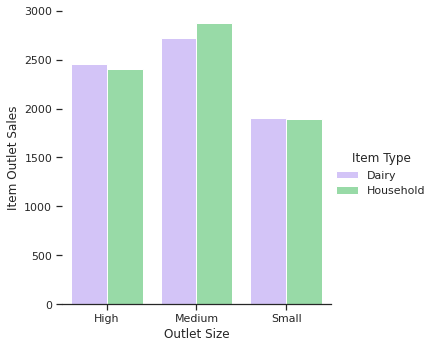

In [385]:
# Barplot anidado:  Ventas de Dairy y House hold dado el tamaño de la tienda
# Este gráfico muestra como las ventas de ambos productos son mayores en las tiendas con tamaño medio
# y como en las tiendas de tamaño pequeño la venta de los productos disminuye. 
sns.set_theme(style="ticks", palette="pastel")

g = sns.catplot(
    data= Filter , kind="bar",
    x="Outlet_Size", y="Item_Outlet_Sales", hue="Item_Type", palette=["m", "g"]
)
g.despine(left=True)
g.set_axis_labels("Outlet Size", "Item Outlet Sales")
g.legend.set_title("Item Type")


In [306]:
#¿Que tan correlacionados estan los datos ?

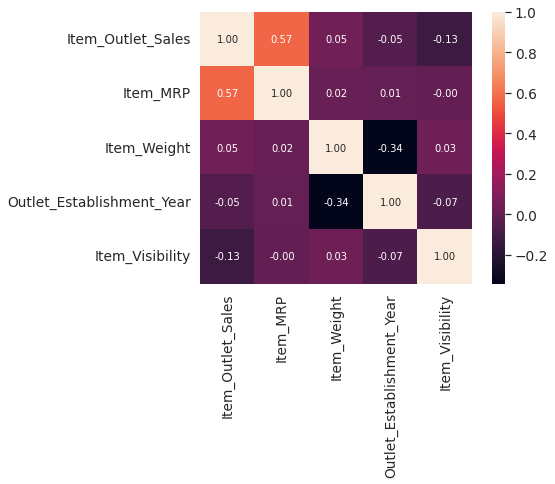

In [387]:
# En esta matriz de correlación podemos ver que la unica variable numerica que tiene correlación con la variable a predecir
# es Item MRP esta correlación es positiva y de casi 0.6

corr = df.corr() 
k = 5 #number of variables for heatmap
plt.subplots(figsize=(7,5))
cols = corr.nlargest(k, 'Item_Outlet_Sales')['Item_Outlet_Sales'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()